In [3]:
import json
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import sklearn
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix



In [4]:
vocab_size = 19000
embedding_dim = 64
max_length = 12
filters = 250
kernel_size = 3
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [5]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
print(len(stopwords))
# Expected Output
# 153

153


In [6]:
data = pd.read_csv('Dataset With Sports.csv')

labels = list(pd.Series(data['category']).str.lower())
headlines = list(pd.Series(data['headline']).str.lower())

for i in range(0,len(headlines)):
    headline = headlines[i]
    for word in stopwords:
        token = " " + word + " "
        headline = headline.replace(token, " ")
    no_punct = ''
    for char in headline:
        if char not in punctuations:
            no_punct = no_punct + char
    headlines[i] = no_punct
print(len(labels))
print(len(headlines))
#print(headlines[0:100])

2496
2496


In [7]:
print(set(labels))

{'business', 'entertainment', 'tech', 'sports', 'medical'}


In [8]:
train_headlines, validation_headlines, train_labels, validation_labels = train_test_split(headlines, labels, test_size=0.2)
print(len(train_headlines))
print(len(train_labels))
print(len(validation_headlines))
print(len(validation_labels))



1996
1996
500
500


In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_headlines)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(word_index)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

{'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'us': 6, 'also': 7, 'new': 8, 'year': 9, 'one': 10, 'can': 11, 'people': 12, 'mr': 13, 'last': 14, 'first': 15, 'music': 16, 'film': 17, 'world': 18, 'two': 19, 't': 20, 'time': 21, 'now': 22, 'game': 23, 'just': 24, 'best': 25, 'years': 26, 'make': 27, 'uk': 28, 'no': 29, 'made': 30, 'like': 31, 'many': 32, 'get': 33, 'market': 34, 'three': 35, 'company': 36, 'number': 37, 'back': 38, 'firm': 39, 'well': 40, 'show': 41, 'take': 42, 'technology': 43, 'way': 44, 'set': 45, 'games': 46, 'may': 47, 'win': 48, 'next': 49, 'right': 50, 'play': 51, '2004': 52, 'good': 53, 'says': 54, 'bbc': 55, 'million': 56, '000': 57, 'still': 58, 'tv': 59, 'won': 60, 'players': 61, 'added': 62, 'told': 63, 'users': 64, 'digital': 65, 'go': 66, 'since': 67, 'much': 68, 'use': 69, 'left': 70, 'second': 71, 'top': 72, 'net': 73, 'week': 74, 'england': 75, 'growth': 76, 'going': 77, 'however': 78, 'work': 79, 'group': 80, 'off': 81, 'software': 82, 'europea

In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_headlines)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

500
(500, 12)


In [11]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

padded_validation_label_seq = pad_sequences(validation_label_seq, padding=padding_type, maxlen=1, truncating=trunc_type)
train_lables_padded = pad_sequences(training_label_seq, padding=padding_type, maxlen=1, truncating=trunc_type)

category_word_index = label_tokenizer.word_index

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
#     tf.keras.layers.LSTM(150, return_sequences = True),
#     tf.keras.layers.LSTM(300),
#     tf.keras.layers.GRU(300),
#     tf.keras.layers.SimpleRNN(100, activation='tanh', return_sequences = True),
#     tf.keras.layers.SimpleRNN(200, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=3),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(48, activation = 'sigmoid'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0008), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 64)            1216000   
_________________________________________________________________
dropout (Dropout)            (None, 12, 64)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 4, 250)            48250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 250)            0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 48)                12048     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 2

In [13]:
num_epochs = 12
history = model.fit(train_padded, train_lables_padded, epochs = num_epochs, validation_data=(validation_padded, padded_validation_label_seq), verbose = 2)

Train on 1996 samples, validate on 500 samples
Epoch 1/12
1996/1996 - 4s - loss: 1.6667 - acc: 0.2345 - val_loss: 1.5882 - val_acc: 0.3080
Epoch 2/12
1996/1996 - 3s - loss: 1.4820 - acc: 0.4434 - val_loss: 1.2988 - val_acc: 0.5900
Epoch 3/12
1996/1996 - 2s - loss: 0.8902 - acc: 0.8146 - val_loss: 0.7530 - val_acc: 0.7940
Epoch 4/12
1996/1996 - 2s - loss: 0.3631 - acc: 0.9649 - val_loss: 0.4875 - val_acc: 0.8740
Epoch 5/12
1996/1996 - 3s - loss: 0.1501 - acc: 0.9925 - val_loss: 0.3956 - val_acc: 0.8960
Epoch 6/12
1996/1996 - 2s - loss: 0.0791 - acc: 0.9990 - val_loss: 0.3589 - val_acc: 0.8980
Epoch 7/12
1996/1996 - 2s - loss: 0.0513 - acc: 1.0000 - val_loss: 0.3479 - val_acc: 0.8920
Epoch 8/12
1996/1996 - 2s - loss: 0.0374 - acc: 1.0000 - val_loss: 0.3332 - val_acc: 0.8960
Epoch 9/12
1996/1996 - 2s - loss: 0.0295 - acc: 1.0000 - val_loss: 0.3340 - val_acc: 0.8960
Epoch 10/12
1996/1996 - 2s - loss: 0.0238 - acc: 1.0000 - val_loss: 0.3291 - val_acc: 0.8980
Epoch 11/12
1996/1996 - 3s - los

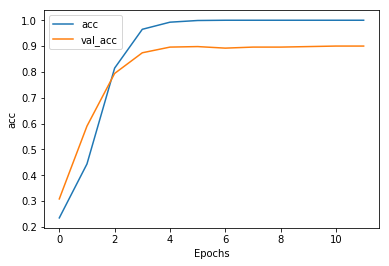

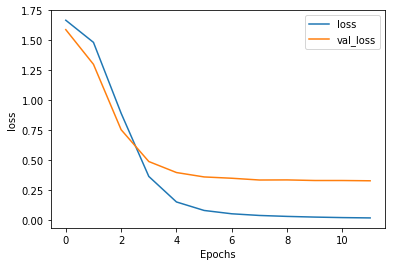

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):

  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [18]:
def clean_data(sentence):
    stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    sentence = sentence.lower()
    for word in stopwords:
        token = " " + word + " "
        sentence = sentence.replace(token, " ")
    no_punct = ''
    for char in sentence:
        if char not in punctuations:
            no_punct = no_punct + char
    sentence = no_punct
    
    return sentence

In [39]:
sentenc = clean_data(' decides to in new ')
sentence = list()
sentence.append(sentenc)
sentence_sequence = tokenizer.texts_to_sequences(sentence)
sentence_padded = pad_sequences(sentence_sequence, padding = padding_type, maxlen=max_length, truncating=trunc_type)

In [40]:
prediction = model.predict(sentence_padded)
print(sentence)
for i in prediction:
    x = (np.where(i == np.amax(i)))[0]
    for a in category_word_index:
        if category_word_index[a] == x:
            print('\n\n',a)

[' decides new ']


 entertainment


In [25]:
print(category_word_index)

{'entertainment': 1, 'tech': 2, 'business': 3, 'medical': 4, 'sports': 5}


In [26]:
print(prediction)

[[1.10773064e-04 6.68618828e-03 1.32399530e-03 9.80093122e-01
  7.06439652e-03 4.72161174e-03]]
